## <span style="font-family: Georgia; font-weight:bold;font-size:1.5em;">  classify the patients with Parkinson Disease or not</span>

In [65]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [66]:
import pandas  as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor 

#To Plot the graph
import matplotlib.pyplot as plt
import seaborn as sns

#To Split Data
from sklearn.model_selection import train_test_split
from sklearn import model_selection

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve



#Confusion Matrix
from sklearn import metrics

#Scaling
from sklearn.preprocessing import StandardScaler

In [67]:
#Used for Styling
class color:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

###  <span style="font-family: Georgia; font-weight:bold;font-size:1.5em;"> Read Data and understand each attribute

In [68]:
data=pd.read_csv("Data - Parkinsons",delimiter=',')
data.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

Categorical Attributes :
1.status
2.name

Numerical Attributes: Except status,name all are numerical variables

name attribute is not required for the analysis where it can tells recording number and subjectname

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [70]:
#Number of Records
print(color.UNDERLINE+'DataType ::'+color.END)
print(data.dtypes.value_counts())
print('\n')


DataType ::
float64    22
object      1
int64       1
dtype: int64




In [71]:
#Structure of the file
print(color.UNDERLINE+'Number of Columns and rows:: (Colmuns,rows)'+color.END)
data.shape

Number of Columns and rows:: (Colmuns,rows)


(195, 24)

In [72]:
data.describe().T

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

In [73]:
print(color.UNDERLINE+'Checking if any columns are null :::'+color.END)
print(data.isnull().values.any())
print('\n')
print(color.UNDERLINE+'Total null values:::'+color.END)
print(data.isnull().sum().sum())

Checking if any columns are null :::
False


Total null values:::
0


In [74]:
dupes = data.duplicated()
print(color.UNDERLINE+color.BOLD+'Duplicates in the DataSet::'+color.END,sum(dupes))
data[data.duplicated()]

Duplicates in the DataSet:: 0


Empty DataFrame
Columns: [name, MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, HNR, status, RPDE, DFA, spread1, spread2, D2, PPE]
Index: []

[0 rows x 24 columns]

Outliers in the DataSet::


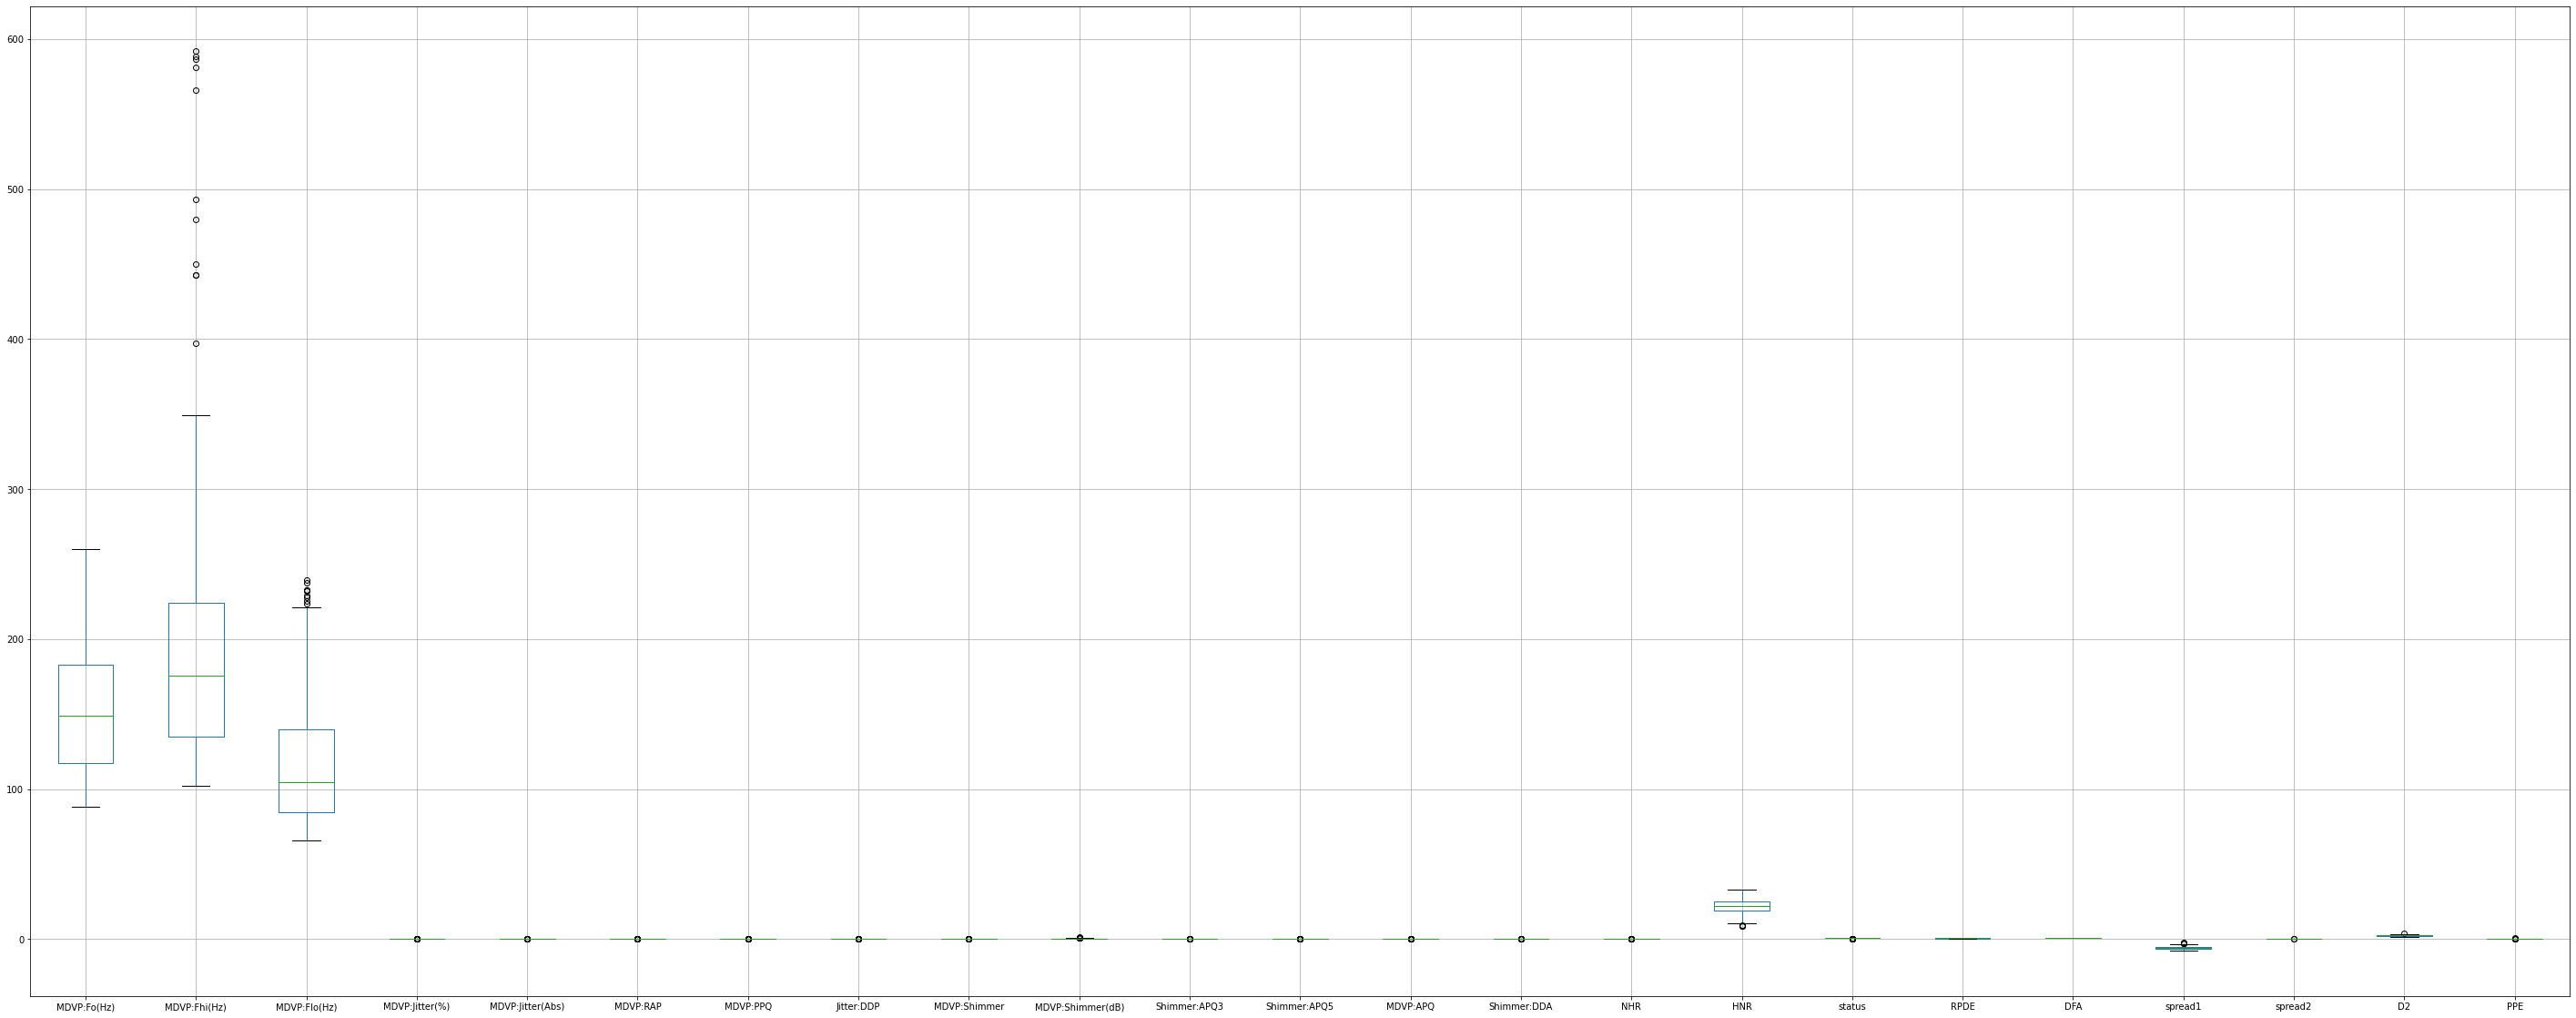

In [75]:
#Outliers
print(color.UNDERLINE+color.BOLD+'Outliers in the DataSet::'+color.END)
data.boxplot(return_type='axes',figsize=(50,20))

#### Observation-1 :
<p style = "font-family:verdana;font-size: 18px"> 
<ul type="square" style = "font-family:verdana;font-size: 18px">
      <li>Number of Records : 195 records without null values and Duplicates </li>
      <li>Number Of Attributes :  24 </li>
      <li>There are more outliers for MDVP:Fhi(Hz) </li>
      <li>status is the target variable </li>
      <li>name which tells about ASCII subject name and recording number - which don't have any effect on the status  </li>
      </ul>
</p>

<p style = "font-family:verdana;font-size: 18px"> <b>Likely Challenges in the dataset</b>
<ul type="square" style = "font-family:verdana;font-size: 18px">We have to check below challenges while analysing the dataset
      <li>Linearity of Parameters : The relationship between the target and independent variables should be linear </li>
      <li> Homescedesticity</li>
      <li> Curse Of Dimensionality - Observations must be greater than no of parameters - If we come across curse of dimensionality we'll use regularization Methods/Shrinkage Methods (Ridge /LASSO)</li>
      <li> Outliers/Null Values/Duplicates should not present</li>
      <li> Check if any categorical variables are present then converting using encoding techniques- For this type of feature engineering we have to be cautious about data overfit/Underfit</li>
      </ul>
</p>

###  <span style="font-family: Georgia; font-weight:bold;font-size:1.5em;"> Univariate & Bivariate Analysis

<Figure size 18000x18000 with 0 Axes>

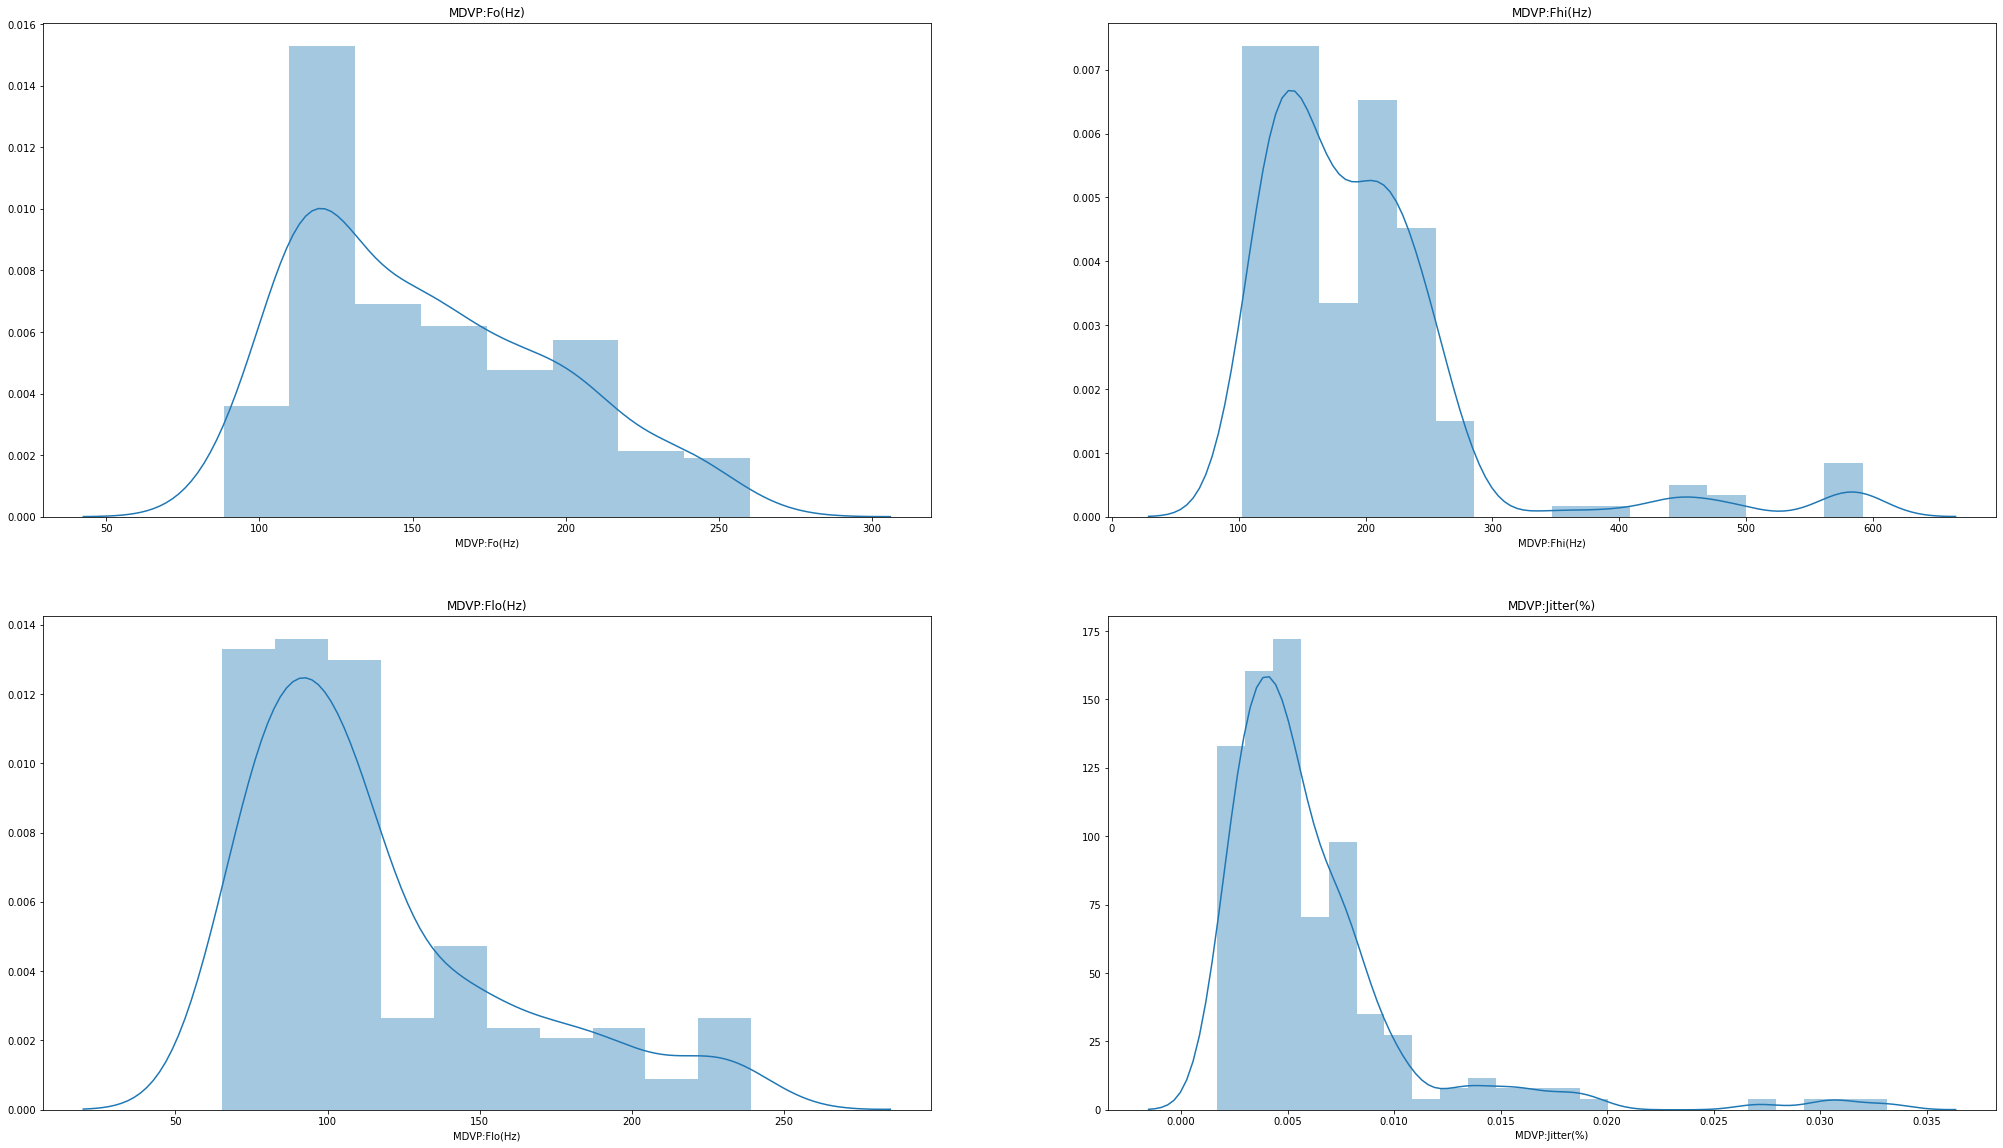

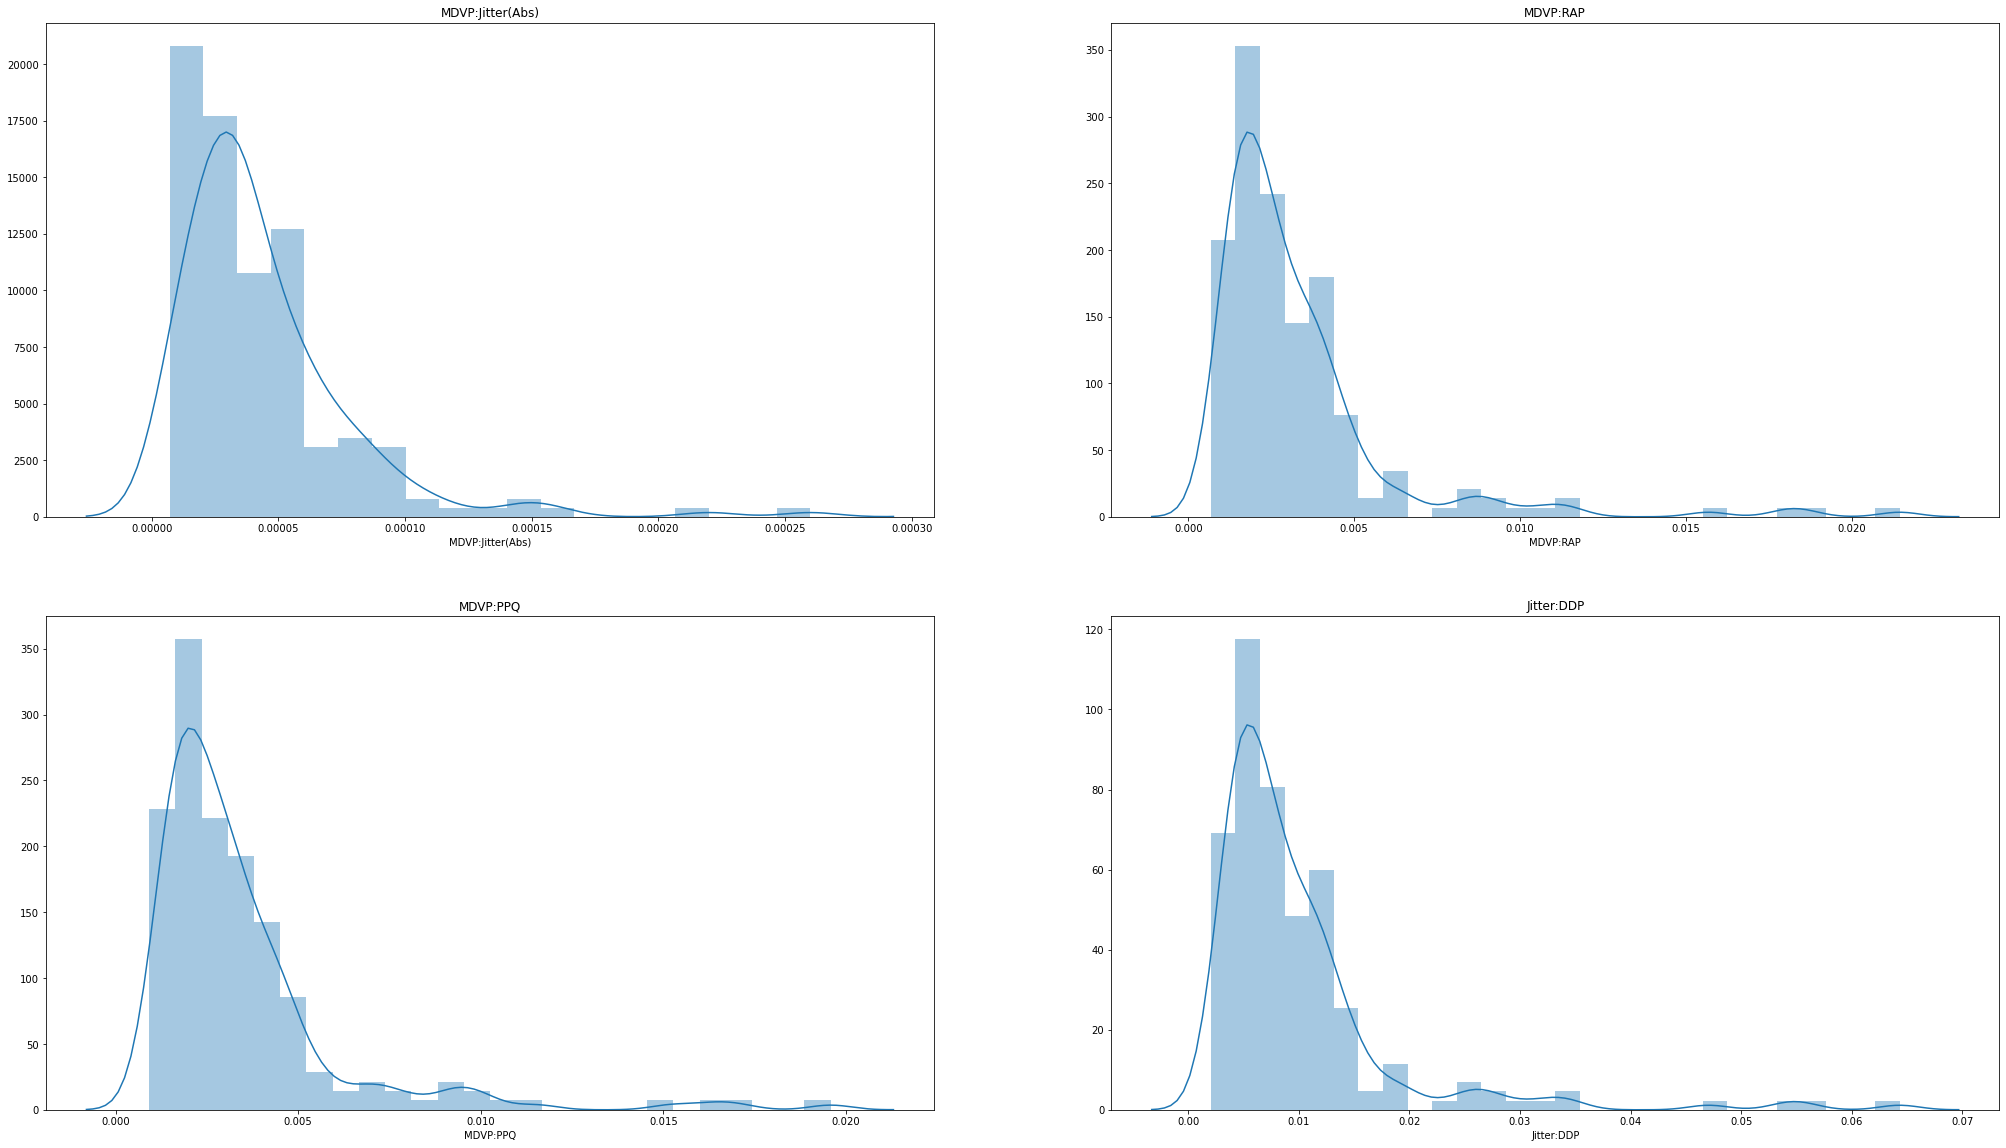

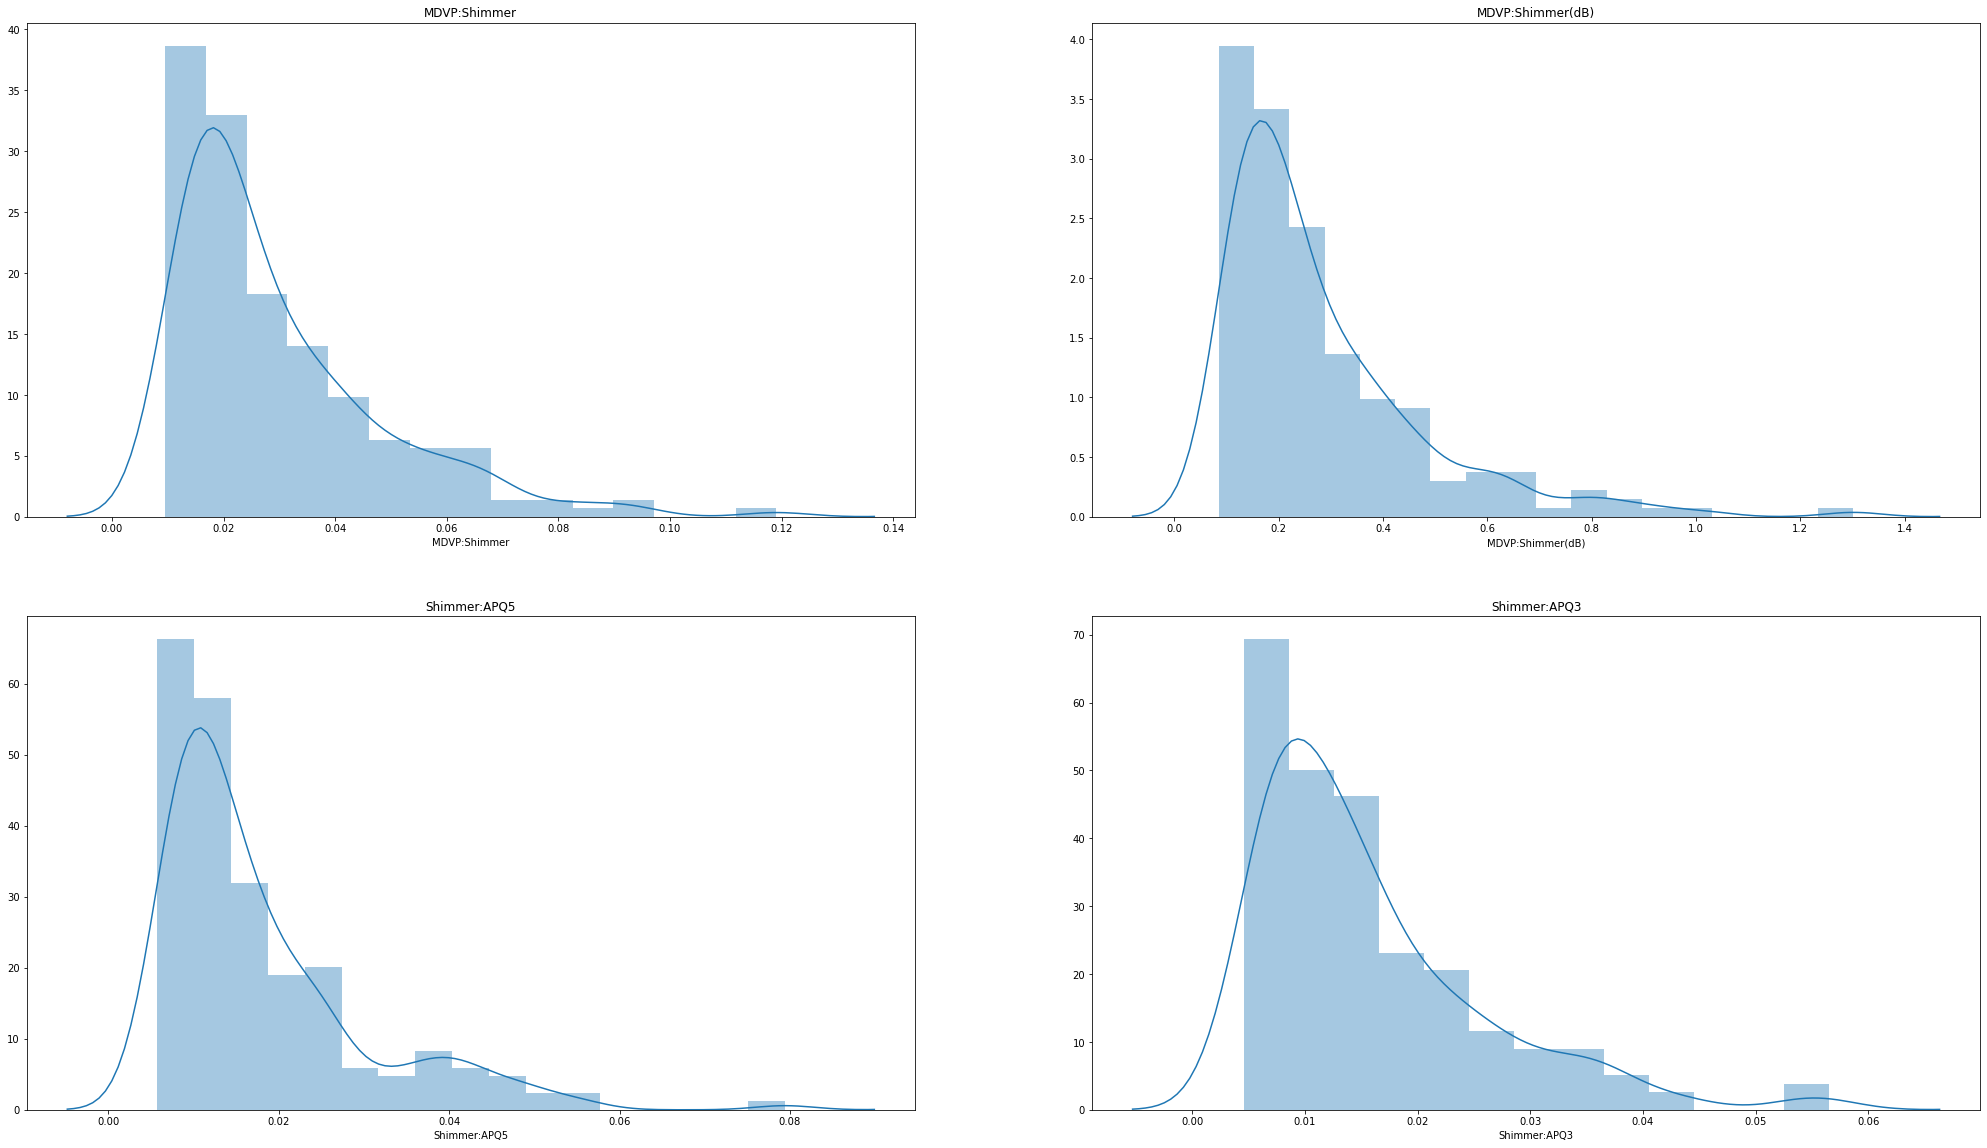

In [76]:
#
plt.figure(figsize=(250,250))
fig, ax = plt.subplots(2, 2)
fig.set_figheight(20)
fig.set_figwidth(35)
sns.distplot(data['MDVP:Fo(Hz)'],ax=ax[0][0])
ax[0][0].set_title('MDVP:Fo(Hz)')
sns.distplot(data['MDVP:Fhi(Hz)'],ax=ax[0][1])
ax[0][1].set_title('MDVP:Fhi(Hz)')
print('')
sns.distplot(data['MDVP:Flo(Hz)'],ax=ax[1][0])
ax[1][0].set_title('MDVP:Flo(Hz)')
sns.distplot(data['MDVP:Jitter(%)'],ax=ax[1][1])
ax[1][1].set_title('MDVP:Jitter(%)')
plt.show()

fig, ax = plt.subplots(2, 2)
fig.set_figheight(20)
fig.set_figwidth(35)
sns.distplot(data['MDVP:Jitter(Abs)'],ax=ax[0][0])
ax[0][0].set_title('MDVP:Jitter(Abs)')
sns.distplot(data['MDVP:RAP'],ax=ax[0][1])
ax[0][1].set_title('MDVP:RAP')
print('')
sns.distplot(data['MDVP:PPQ'],ax=ax[1][0])
ax[1][0].set_title('MDVP:PPQ')
sns.distplot(data['Jitter:DDP'],ax=ax[1][1])
ax[1][1].set_title('Jitter:DDP')
plt.show()

fig, ax = plt.subplots(2, 2)
fig.set_figheight(20)
fig.set_figwidth(35)
sns.distplot(data['MDVP:Shimmer'],ax=ax[0][0])
ax[0][0].set_title('MDVP:Shimmer')
sns.distplot(data['MDVP:Shimmer(dB)'],ax=ax[0][1])
ax[0][1].set_title('MDVP:Shimmer(dB)')
print('')
sns.distplot(data['Shimmer:APQ5'],ax=ax[1][0])
ax[1][0].set_title('Shimmer:APQ5')
sns.distplot(data['Shimmer:APQ3'],ax=ax[1][1])
ax[1][1].set_title('Shimmer:APQ3')
plt.show()



<Figure size 18000x18000 with 0 Axes>

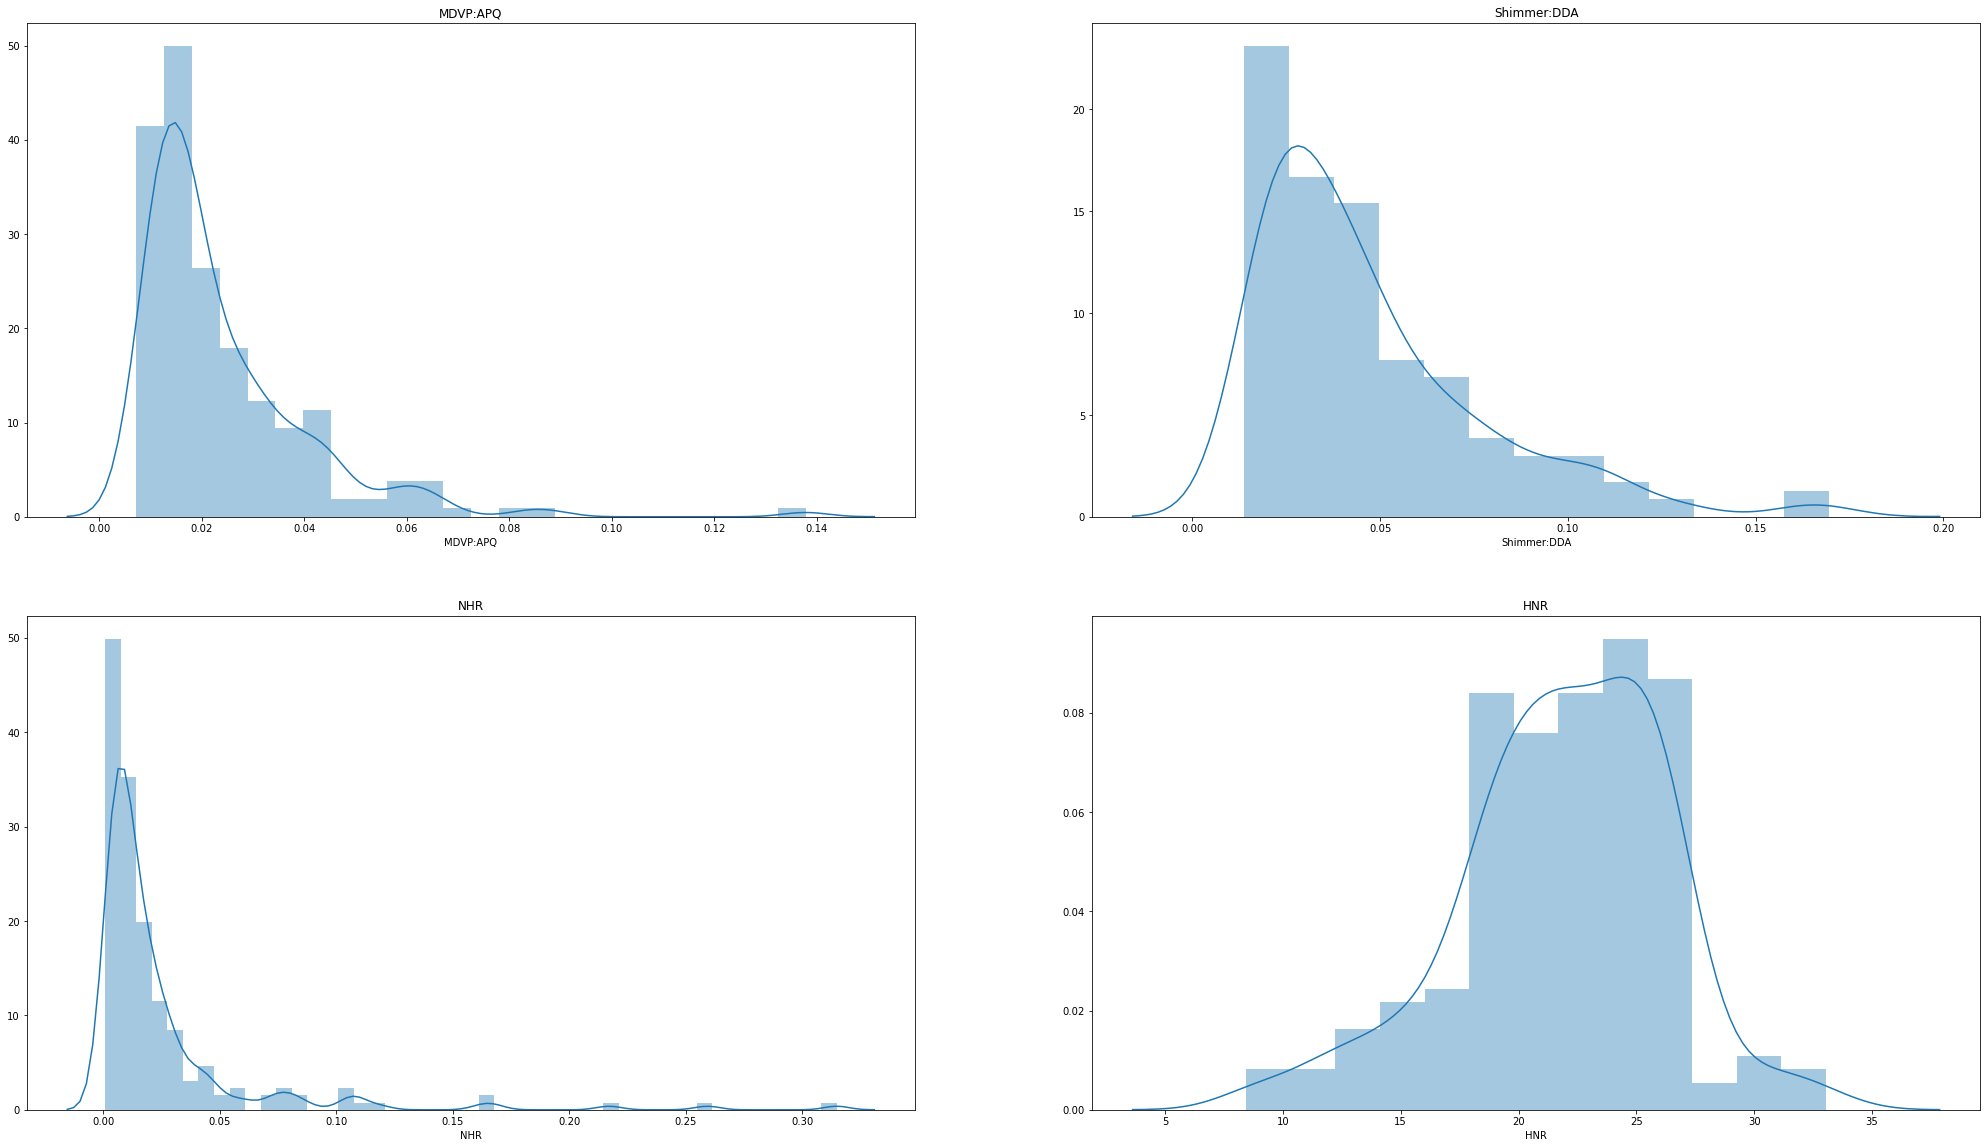

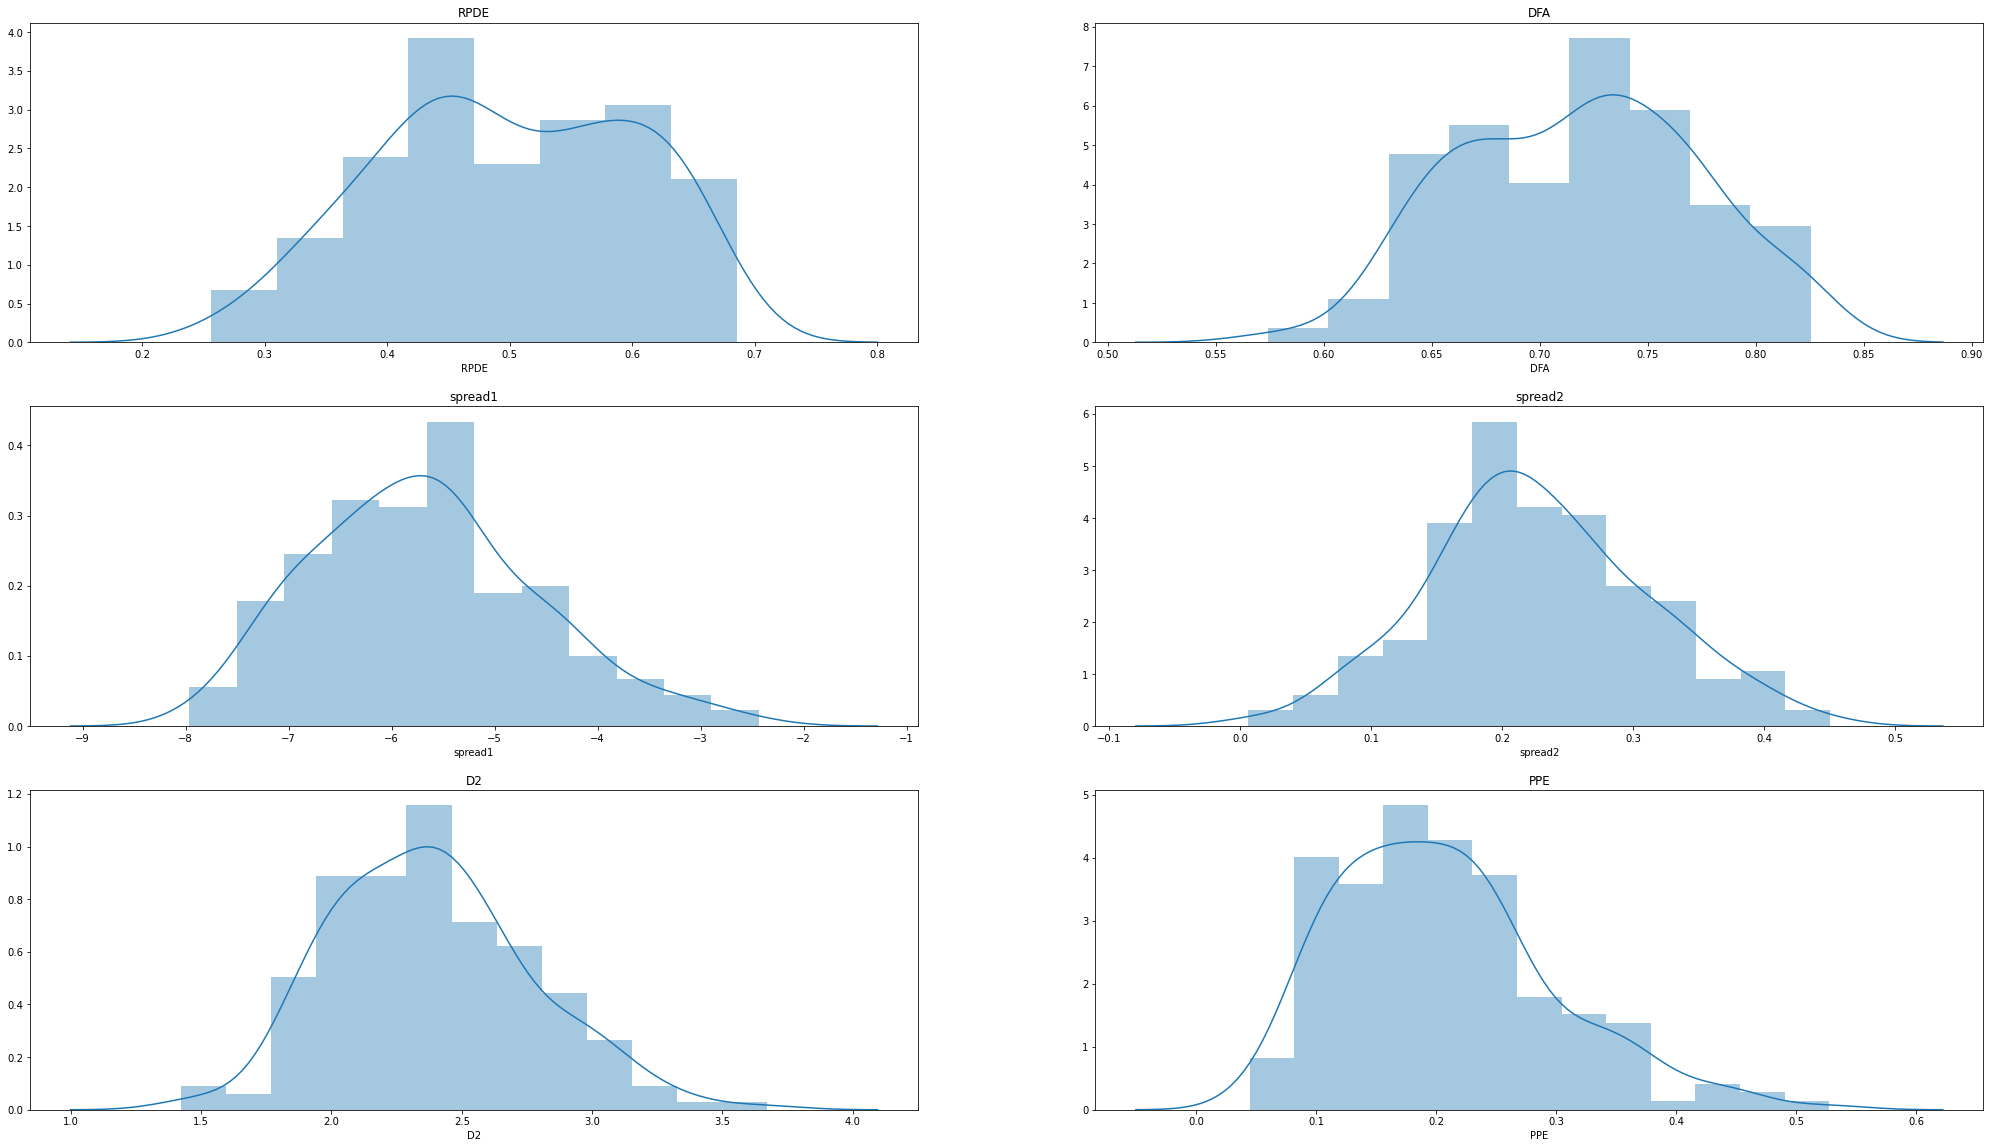

In [77]:
plt.figure(figsize=(250,250))
fig, ax = plt.subplots(2, 2)
fig.set_figheight(20)
fig.set_figwidth(35)
sns.distplot(data['MDVP:APQ'],ax=ax[0][0])
ax[0][0].set_title('MDVP:APQ')
sns.distplot(data['Shimmer:DDA'],ax=ax[0][1])
ax[0][1].set_title('Shimmer:DDA')
print('')
sns.distplot(data['NHR'],ax=ax[1][0])
ax[1][0].set_title('NHR')
sns.distplot(data['HNR'],ax=ax[1][1])
ax[1][1].set_title('HNR')
plt.show()
fig, ax = plt.subplots(3, 2)
fig.set_figheight(20)
fig.set_figwidth(35)
sns.distplot(data['RPDE'],ax=ax[0][0])
ax[0][0].set_title('RPDE')
sns.distplot(data['DFA'],ax=ax[0][1])
ax[0][1].set_title('DFA')
print('')
sns.distplot(data['spread1'],ax=ax[1][0])
ax[1][0].set_title('spread1')
sns.distplot(data['spread2'],ax=ax[1][1])
ax[1][1].set_title('spread2')
sns.distplot(data['D2'],ax=ax[2][0])
ax[2][0].set_title('D2')
sns.distplot(data['PPE'],ax=ax[2][1])
ax[2][1].set_title('PPE')
plt.show()

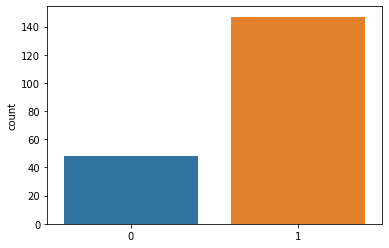

In [78]:
sns.countplot(data['status'].values)

In [79]:
n_true = len(data.loc[data['status'] == 1])
n_false = len(data.loc[data['status'] == 0])
print("Number of Parkinson Diagnosed cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of Cases Not Diagnosed as Parkinson: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of Parkinson Diagnosed cases: 147 (75.38%)
Number of Cases Not Diagnosed as Parkinson: 48 (24.62%)


In [80]:
data.corr()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   
MDVP:APQ            -0.077774      0.004937     -0.107293        0.758255   
Shimmer:DDA         -0.094732     -0.003733     -0.150737        0.746635   
NHR                 -0.021981      0.163766     -0.108670        0.906959   
HNR                  0.059144     -0.024893      0.210851       -0.728165   
status              -0.383535     -0.166136     -0.380200        0.278220   
RPDE                -0.383894     -0.112404     -0.400143        0.360673   
DFA                 -0.446013     -0.343097     -0.050406        0.098572   
spread1             -0.413738     -0.076658     -0.394857        0.693577   
spread2             -0.249450     -0.002954     -0.243829        0.385123   
D2                   0.177980      0.176323     -0.100629        0.433434   
PPE                 -0.372356     -0.069543     -0.340071        0.721543   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo(Hz)              -0.382027 -0.076194 -0.112165   -0.076213   
MDVP:Fhi(Hz)             -0.029198  0.097177  0.091126    0.097150   
MDVP:Flo(Hz)             -0.277815 -0.100519 -0.095828   -0.100488   
MDVP:Jitter(%)            0.935714  0.990276  0.974256    0.990276   
MDVP:Jitter(Abs)          1.000000  0.922911  0.897778    0.922913   
MDVP:RAP                  0.922911  1.000000  0.957317    1.000000   
MDVP:PPQ                  0.897778  0.957317  1.000000    0.957319   
Jitter:DDP                0.922913  1.000000  0.957319    1.000000   
MDVP:Shimmer              0.703322  0.759581  0.797826    0.759555   
MDVP:Shimmer(dB)          0.716601  0.790652  0.839239    0.790621   
Shimmer:APQ3              0.697153  0.744912  0.763580    0.744894   
Shimmer:APQ5              0.648961  0.709927  0.786780    0.709907   
MDVP:APQ                  0.648793  0.737455  0.804139    0.737439   
Shimmer:DDA               0.697170  0.744919  0.763592    0.744901   
NHR                       0.834972  0.919521  0.844604    0.919548   
HNR                      -0.656810 -0.721543 -0.731510   -0.721494   
status                    0.338653  0.266668  0.288698    0.266646   
RPDE                      0.441839  0.342140  0.333274    0.342079   
DFA                       0.175036  0.064083  0.196301    0.064026   
spread1                   0.735779  0.648328  0.716489    0.648328   
spread2                   0.388543  0.324407  0.407605    0.324377   
D2                        0.310694  0.426605  0.412524    0.426556   
PPE                       0.748162  0.670999  0.769647    0.671005   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  Shimmer:DDA       NHR  \
MDVP:Fo(Hz)          -0.098374         -0.073742  ...    -0.094732 -0.021981   
MDVP:Fhi(Hz)          0.002281          0.043465  ...    -0.003733  0.163766   
MDVP:Flo(Hz)         -0.144543         -0.119089  ...    -0.150737 -0.108670   
MDVP:Jitter(%)        0.769063          0.804289  ...     0.746635  0.906959   
MDVP:Jitter(Abs)      0.703322          0.716601  ...     0.697170  0.834972   
MDVP:RAP

In [81]:
data.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

#### Observation-2:
<p style = "font-family:verdana;font-size: 18px"> 
<ul type="square" style = "font-family:verdana;font-size: 18px">Observations for the univariate and bivariate Distribution
      <li> As from Univariate Distribution from the each attribute we can guess that few attributes have high correlation with other attributes - i.e,, few distplot looks similar </li>
      <li>Using the function corr() we can confirm that correlation value 1 is between few attribute - We'll check bivariate relationship between them</li>
    <li>For the Univariate Distribution for Target Variable status - approx 75% are diagnosed with Parkinson and 25% are not diagnosed with parkinson</li>
    <li> As from the univariate distribution - Positively Skewed Attributes are : MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP etc.. i.e,, Almost all the attributes are positively skewed</li>
    <li>Attributes that are normally Distributed are : PPE,D2,spread1,spread2</li>
    <li>Where RPDE, DFA are similar to Bernoullis Distribution</li>
      </ul>
</p>

<p style = "font-family:verdana;font-size: 18px"> 
<ul type="square" style = "font-family:verdana;font-size: 18px"><b>Attributes that are strongly Correlated.</b>Here taking correlation values near to 1 or exactly 1
    <li> MDVP:Jitter(%)	 with MDVP:RAP , Jitter:DDP</li>
    <li> In next section we can plot scatter graphs between the highly correlated attributes</li>
    <li>MDVP:RAP,Jitter:DDP both have the Correlation value as 1.00000 </li>
     <li>Similarly for Shimmer:APQ3 & Shimmer:DDA</li>
      </ul>
</p>

#### Bivariate Distribution for Strong Correlation Attributes

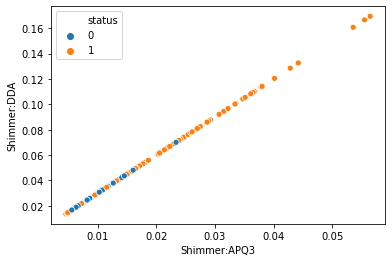

In [82]:
sns.scatterplot(data['Shimmer:APQ3'],data['Shimmer:DDA'],hue=data['status'])

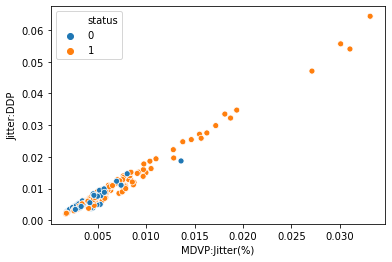

In [83]:
sns.scatterplot(data['MDVP:Jitter(%)'],data['Jitter:DDP'],hue=data['status'])

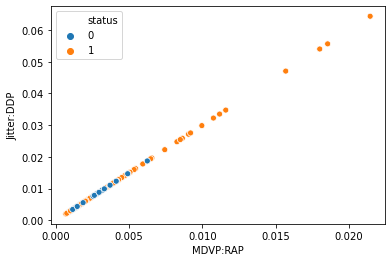

In [84]:
sns.scatterplot(data['MDVP:RAP'],data['Jitter:DDP'],hue=data['status'])

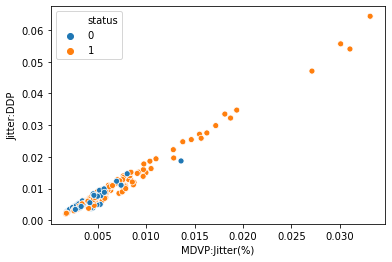

In [85]:
sns.scatterplot(data['MDVP:Jitter(%)'],data['Jitter:DDP'],hue=data['status'])

###  <span style="font-family: Georgia; font-weight:bold;font-size:1.5em;"> BiVariate Distribution of Each attribute with Target attribute status

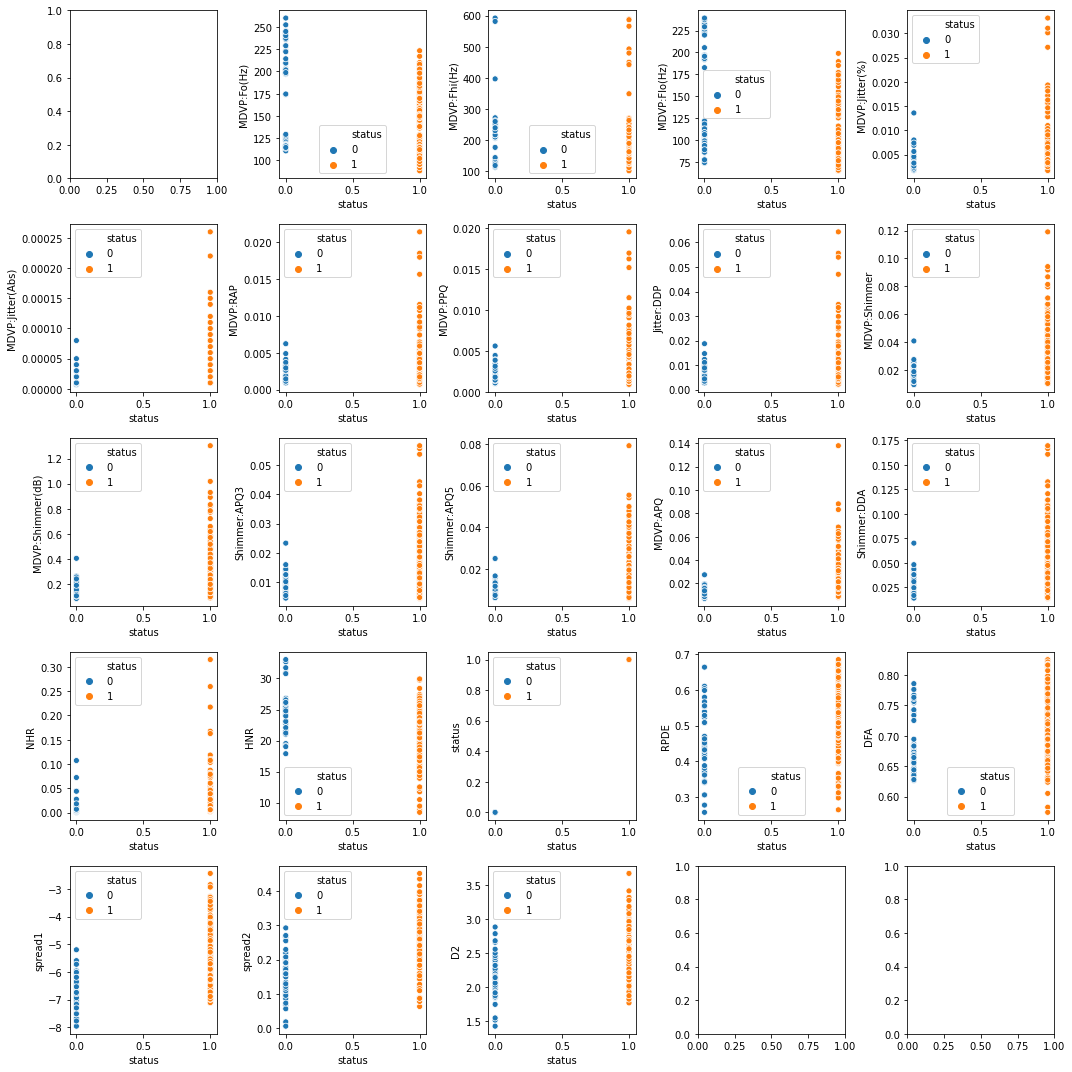

In [86]:
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(data.columns)-1):
    sns.scatterplot(x='status',y=data.iloc[:,i],data=data,hue='status',ax=axes[i])
plt.tight_layout()
plt.show()

#### Observation-3:
<p style = "font-family:verdana;font-size: 18px"> 
<ul type="square" style = "font-family:verdana;font-size: 18px">Observations for the univariate and bivariate Distribution
      <li> MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
measures of variation in fundamental frequency -- If the frequency is less then that person is not diagnosed with parkinson disease - i.ee for high frequency we can say that person is classified as Parkinson - Similar to MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA </li>
    <li> For HNR -Measure for noise to tonal component - For Low frequency there is no patient with parkinson </li>
      </ul>
</p>

In [87]:
data_normalized=data.copy()
data_normalized_dup=data.copy()

### Dealing with Outliers

F:\PGP-AIML\Python_Projects\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


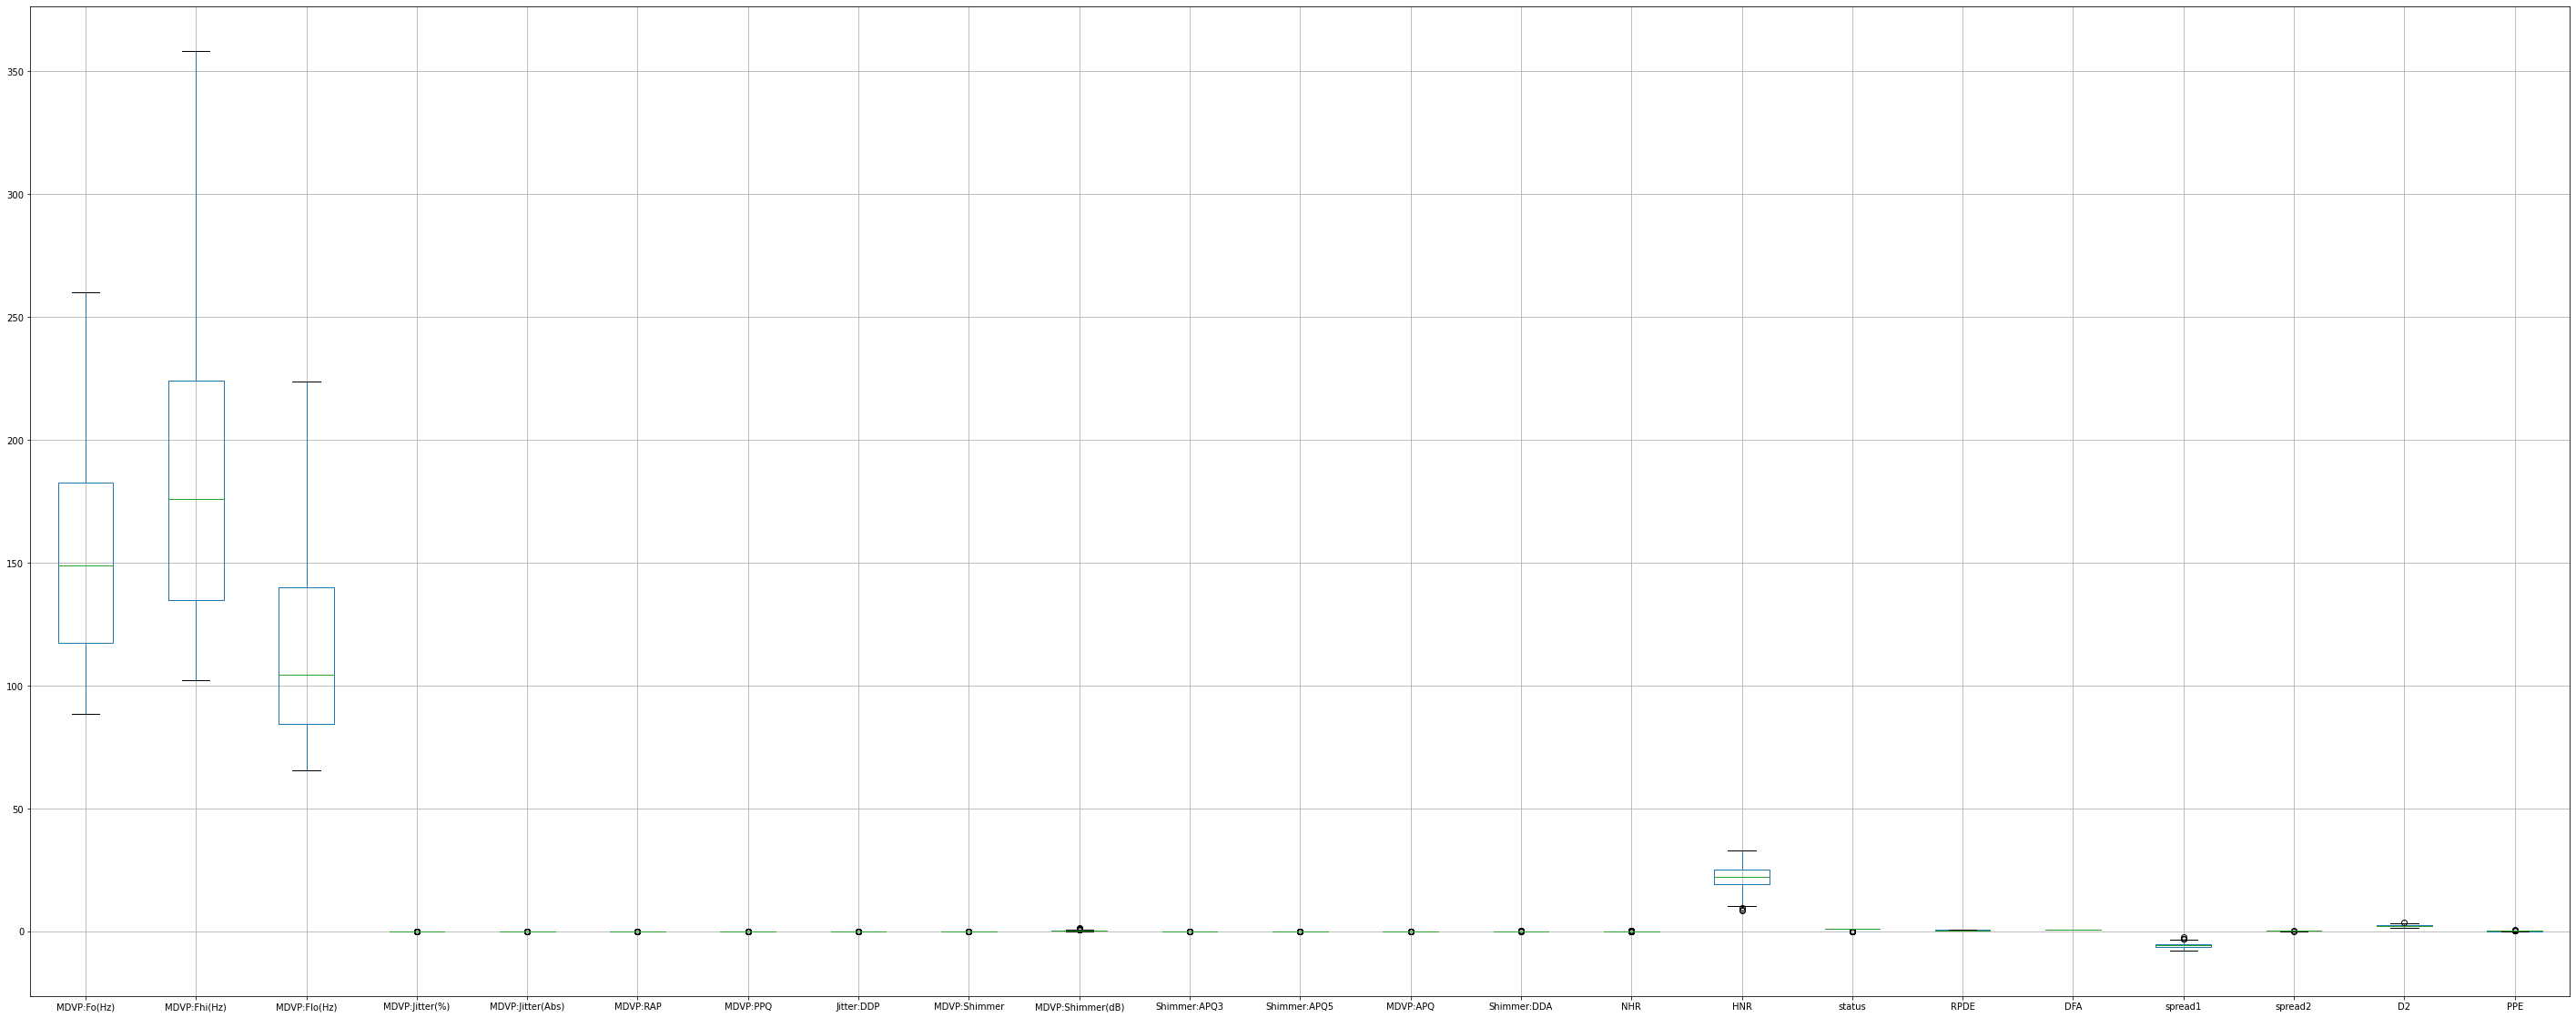

In [88]:
#Remove Using IQR
Q1 = data_normalized['MDVP:Fhi(Hz)'].quantile(0.25)
Q3 = data_normalized['MDVP:Fhi(Hz)'].quantile(0.75)
IQR = Q3 - Q1
for i in np.where(data_normalized['MDVP:Fhi(Hz)'] > Q3 + 1.5 * IQR):
    data_normalized['MDVP:Fhi(Hz)'].iloc[i] = Q3 + 1.5 * IQR

Q1 = data_normalized['MDVP:Flo(Hz)'].quantile(0.25)
Q3 = data_normalized['MDVP:Flo(Hz)'].quantile(0.75)
IQR = Q3 - Q1
for i in np.where(data_normalized['MDVP:Flo(Hz)'] > Q3 + 1.5 * IQR):
    data_normalized['MDVP:Flo(Hz)'].iloc[i] = Q3 + 1.5 * IQR
data_normalized.boxplot(return_type='axes',figsize=(50,20))

### Dealing with Multicollinearity

#### Observation-4:

<p style = "font-family:verdana;font-size: 18px"> 
<ul type="square" style = "font-family:verdana;font-size: 18px">
        <li>MDVP:RAP,Jitter:DDP both have the strong Correlation </li>
     <li>Similarly for Shimmer:APQ3 & Shimmer:DDA have Strong Correlation</li>
    <li>So removing Shimmer:APQ3 & Jitter:DDP to avoid multicollinearity</li>
      </ul>
</p>

 Removing target Column and non-dependent Columns

In [90]:
#Splitting Data Removing Experience & Target Column,Shimmer:APQ3 & Jitter:DDP
X = data_normalized.drop(['name','Shimmer:APQ3','Jitter:DDP','status'],axis=1)     # Predictor feature columns (8 X m)
Y = data_normalized['status'] 
print(X.shape)
print(Y.shape)

(195, 20)
(195,)


#### Spliting data into 70% training and 30% Test

In [91]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

#### Scale the Training Data

In [94]:
#Before scaling
x_train.describe().T

count        mean        std         min         25%  \
MDVP:Fo(Hz)       136.0  152.747022  40.922701   88.333000  117.721000   
MDVP:Fhi(Hz)      136.0  182.151324  56.472304  102.145000  133.047500   
MDVP:Flo(Hz)      136.0  118.283379  41.764894   65.476000   87.411000   
MDVP:Jitter(%)    136.0    0.006542   0.005442    0.001680    0.003545   
MDVP:Jitter(Abs)  136.0    0.000046   0.000038    0.000009    0.000020   
MDVP:RAP          136.0    0.003517   0.003338    0.000680    0.001690   
MDVP:PPQ          136.0    0.003641   0.003086    0.000920    0.001935   
MDVP:Shimmer      136.0    0.031526   0.020272    0.009580    0.016598   
MDVP:Shimmer(dB)  136.0    0.301279   0.212990    0.085000    0.153500   
Shimmer:APQ5      136.0    0.019022   0.012889    0.005700    0.009758   
MDVP:APQ          136.0    0.025648   0.018540    0.007260    0.013160   
Shimmer:DDA       136.0    0.049801   0.032521    0.013640    0.025788   
NHR               136.0    0.027268   0.045158    0.000650    0.005803   
HNR               136.0   21.557434   4.540023    8.441000   18.929750   
RPDE              136.0    0.500994   0.109640    0.256570    0.415369   
DFA               136.0    0.720844   0.054109    0.605417    0.678638   
spread1           136.0   -5.639028   1.089056   -7.964984   -6.420860   
spread2           136.0    0.225358   0.084594    0.006274    0.175564   
D2                136.0    2.394157   0.391343    1.423287    2.099870   
PPE               136.0    0.210577   0.091207    0.044539    0.141802   

                         50%         75%         max  
MDVP:Fo(Hz)       146.658500  180.393000  245.510000  
MDVP:Fhi(Hz)      165.363500  217.986500  358.220000  
MDVP:Flo(Hz)      106.185500  142.761250  223.609750  
MDVP:Jitter(%)      0.004955    0.007203    0.033160  
MDVP:Jitter(Abs)    0.000035    0.000060    0.000260  
MDVP:RAP            0.002500    0.003895    0.021440  
MDVP:PPQ            0.002800    0.003912    0.019580  
MDVP:Shimmer        0.023525    0.040500    0.119080  
MDVP:Shimmer(dB)    0.226000    0.371750    1.302000  
Shimmer:APQ5        0.014230    0.024293    0.079400  
MDVP:APQ            0.018855    0.032257    0.137780  
Shimmer:DDA         0.039155    0.065492    0.169420  
NHR                 0.011795    0.026390    0.314820  
HNR                22.000000   24.956000   33.047000  
RPDE                0.497517    0.600247    0.685151  
DFA                 0.725421    0.763035    0.825288  
spread1            -5.685711   -5.103933   -2.434031  
spread2             0.220753    0.279972    0.450493  
D2                  2.395272    2.643197    3.671155  
PPE                 0.198212    0.252692    0.527367

In [95]:
#After Scaling
cols=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)',  'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']
X_train_scaled = x_train.copy()
X_test_scaled = x_test.copy()
for i in cols:
    scale = StandardScaler().fit(X_train_scaled[[i]])
    X_train_scaled[i] = scale.transform(X_train_scaled[[i]])
    X_test_scaled[i] = scale.transform(X_test_scaled[[i]])
    
X_train_scaled.describe().T

count          mean       std       min       25%       50%  \
MDVP:Fo(Hz)       136.0 -3.869454e-16  1.003697 -1.579860 -0.859071 -0.149331   
MDVP:Fhi(Hz)      136.0 -6.127656e-17  1.003697 -1.421973 -0.872735 -0.298374   
MDVP:Flo(Hz)      136.0 -4.898043e-18  1.003697 -1.269071 -0.741927 -0.290737   
MDVP:Jitter(%)    136.0 -1.053079e-16  1.003697 -0.896602 -0.552645 -0.292602   
MDVP:Jitter(Abs)  136.0 -1.330635e-16  1.003697 -0.978143 -0.687402 -0.290936   
MDVP:RAP          136.0  1.265328e-16  1.003697 -0.853098 -0.549393 -0.305827   
MDVP:PPQ          136.0  1.089815e-16  1.003697 -0.884939 -0.554847 -0.273538   
MDVP:Shimmer      136.0 -1.240837e-16  1.003697 -1.086596 -0.739141 -0.396142   
MDVP:Shimmer(dB)  136.0  1.485740e-16  1.003697 -1.019198 -0.696397 -0.354748   
Shimmer:APQ5      136.0 -1.444923e-16  1.003697 -1.037458 -0.721488 -0.373201   
MDVP:APQ          136.0 -1.877583e-17  1.003697 -0.995451 -0.676051 -0.367748   
Shimmer:DDA       136.0 -1.910237e-16  1.003697 -1.116069 -0.741155 -0.328587   
NHR               136.0 -5.469481e-17  1.003697 -0.591624 -0.477103 -0.343911   
HNR               136.0  8.645045e-16  1.003697 -2.899748 -0.580922  0.097841   
RPDE              136.0  2.383714e-16  1.003697 -2.237568 -0.783852 -0.031829   
DFA               136.0  1.033487e-15  1.003697 -2.141119 -0.782900  0.084914   
spread1           136.0  8.457287e-16  1.003697 -2.143651 -0.720553 -0.043024   
spread2           136.0  2.942907e-16  1.003697 -2.599413 -0.590805 -0.054629   
D2                136.0  1.751050e-16  1.003697 -2.490037 -0.754772  0.002859   
PPE               136.0 -2.563309e-16  1.003697 -1.827181 -0.756839 -0.136073   

                       75%       max  
MDVP:Fo(Hz)       0.678063  2.275165  
MDVP:Fhi(Hz)      0.636908  3.129314  
MDVP:Flo(Hz)      0.588254  2.531211  
MDVP:Jitter(%)    0.121898  4.909175  
MDVP:Jitter(Abs)  0.369840  5.656050  
MDVP:RAP          0.113646  5.389392  
MDVP:PPQ          0.088262  5.183540  
MDVP:Shimmer      0.444336  4.335044  
MDVP:Shimmer(dB)  0.332086  4.715807  
Shimmer:APQ5      0.410397  4.701784  
MDVP:APQ          0.357805  6.070334  
Shimmer:DDA       0.484280  3.691845  
NHR              -0.019518  6.391219  
HNR               0.751346  2.540084  
RPDE              0.908607  1.685859  
DFA               0.782624  1.937396  
spread1           0.493155  2.953794  
spread2           0.648000  2.671214  
D2                0.638724  3.275177  
PPE               0.463457  3.486141

#### definition of functions to call

In [96]:
def accuracy_comparision(model):
    score=model.score(X_test_scaled, y_test)
    return score

def confusion_matrix(model1,y_predict1,model2,y_predict2,model3,y_predict3,model4,y_predict4):
    plt.figure(figsize=(20,20))
    fig, ax = plt.subplots(1, 4)
    fig.set_figheight(6)
    fig.set_figwidth(25)
    i=0
    for y_predict,model in zip([y_predict1,y_predict2,y_predict3,y_predict4],[model1,model2,model3,model4]):
        cm1=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
        model_cm1 = pd.DataFrame(cm1, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
        sns.heatmap(model_cm1, annot=True,fmt='g',cmap='twilight',ax=ax[i])
        ax[i].set_title(model)
        i+=1
    return

def roc_curve_plot(model1,model2,model3,model4,model5,model6,model7):
    #Model1- LogisticRegression
    roc_auc1 = roc_auc_score(y_test, model1.predict(X_test_scaled))
    fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.predict_proba(X_test_scaled)[:,1])
    #Model2 - NaiveBayes
    roc_auc2 = roc_auc_score(y_test, model2.predict(X_test_scaled))
    fpr2, tpr2, thresholds2 = roc_curve(y_test, model2.predict_proba(X_test_scaled)[:,1])
    #Model3- KNN 
    roc_auc3 = roc_auc_score(y_test, model3.predict(X_test_scaled))
    fpr3, tpr3, thresholds3 = roc_curve(y_test, model3.predict_proba(X_test_scaled)[:,1])
    #Model4- RandomForest
    roc_auc4 = roc_auc_score(y_test, model4.predict(X_test_scaled))
    fpr4, tpr4, thresholds4 = roc_curve(y_test, model4.predict_proba(X_test_scaled)[:,1])
    #Model5- ADABoost
    roc_auc5 = roc_auc_score(y_test, model5.predict(X_test_scaled))
    fpr5, tpr5, thresholds5 = roc_curve(y_test, model5.predict_proba(X_test_scaled)[:,1])
    #Model6- Gradient Algorithm
    roc_auc6 = roc_auc_score(y_test, model6.predict(X_test_scaled))
    fpr6, tpr6, thresholds6 = roc_curve(y_test, model6.predict_proba(X_test_scaled)[:,1])
    #Model7- Bagging Algorithm
    roc_auc7 = roc_auc_score(y_test, model7.predict(X_test_scaled))
    fpr7, tpr7, thresholds7 = roc_curve(y_test, model7.predict_proba(X_test_scaled)[:,1])
   
   
    plt.figure(figsize=(16,8))
    plt.plot(fpr1, tpr1, label='LogisticRegression (area = %0.2f)' % roc_auc1)
    plt.plot(fpr2, tpr2, label='NaiveBayes (area = %0.2f)' % roc_auc2)
    plt.plot(fpr3, tpr3, label='KNN (area = %0.2f)' % roc_auc3)
    plt.plot(fpr4, tpr4, label='RandomForest (area = %0.2f)' % roc_auc4)
    plt.plot(fpr5, tpr5, label='ADABoost (area = %0.2f)' % roc_auc5)
    plt.plot(fpr6, tpr6, label='GradientBoost (area = %0.2f)' % roc_auc6)
    plt.plot(fpr7, tpr7, label='Bagging (area = %0.2f)' % roc_auc7)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparision for all Algorithms')
    plt.legend(loc="lower right")
    plt.savefig('ROC Curve')
    plt.show()

Here Based Upon the K Value Graph Taking K between 2 to 6 for KNN


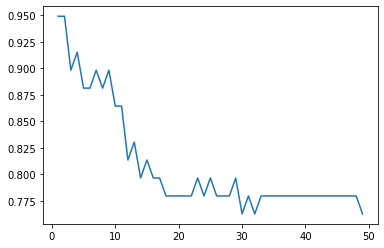

In [97]:
#To select the k value based on the graph for KNN
scores =[]
for k in range(1,50):
    KNN_model = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    KNN_model.fit(X_train_scaled, y_train)
    scores.append(KNN_model.score(X_test_scaled, y_test))
plt.plot(range(1,50),scores)

print('Here Based Upon the K Value Graph Taking K between 2 to 6 for KNN')

In [98]:
#Logistic Model
logistic_model=LogisticRegression(solver="liblinear")
logistic_model.fit(X_train_scaled, y_train)
y_predict_logistic = logistic_model.predict(X_test_scaled)

#NB Model
NB_model = GaussianNB()
NB_model.fit(X_train_scaled, y_train)
y_predict_nb = NB_model.predict(X_test_scaled)

#K-NN
KNN_model = KNeighborsClassifier(n_neighbors= 6 , weights = 'distance' )
KNN_model.fit(X_train_scaled, y_train)
y_predict_knn = KNN_model.predict(X_test_scaled)

#SVM
SVM_model = SVC(kernel='rbf', random_state = 1)
SVM_model.fit(X_train_scaled,y_train)
y_predict_svm = SVM_model.predict(X_test_scaled)


In [99]:
print(color.UNDERLINE+"Accuracy scores for different models on test data:::"+color.END)
print("Logistic Model::",accuracy_comparision(logistic_model))
print("Naive Bayes Model::",accuracy_comparision(NB_model))
print("KNN Model::",accuracy_comparision(KNN_model))
print("SVM Model::",accuracy_comparision(SVM_model))

Accuracy scores for different models on test data:::
Logistic Model:: 0.8135593220338984
Naive Bayes Model:: 0.6949152542372882
KNN Model:: 0.8813559322033898
SVM Model:: 0.7966101694915254


#### Applying Metaclasifier - Stacking Technique

Here using CV (Cross Validation Value as 5 where the train data is spllited into 5 sub sets for iterations and meta_classifier as SVM . I tried meta_classifier with all logistic,NB,KNN but for only SVM it is 0.88).

In [100]:
sclf = StackingClassifier(classifiers=[logistic_model, NB_model, KNN_model], meta_classifier = SVM_model)
for clf, label in zip([logistic_model, NB_model, KNN_model, sclf], ['Logistic', 'NB', 'KNN','StackingClassifier']):
    scores = model_selection.cross_val_score(clf, X_test_scaled, y_test, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f Standard_Deviation: (+/- %0.2f) [%s]"  % (scores.mean(), scores.std(), label))

Accuracy: 0.80 Standard_Deviation: (+/- 0.04) [Logistic]
Accuracy: 0.71 Standard_Deviation: (+/- 0.06) [NB]
Accuracy: 0.90 Standard_Deviation: (+/- 0.07) [KNN]
Accuracy: 0.90 Standard_Deviation: (+/- 0.07) [StackingClassifier]


#### Ensemble Technique

In [101]:
#1. Random Forest
rfcl_model = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl_model.fit(X_train_scaled, y_train)
y_predict_rfcl = rfcl_model.predict(X_test_scaled)

#2.Boosting
  #2.1 AdaBoosting
abcl_model = AdaBoostClassifier(n_estimators=66, random_state=1)
abcl_model.fit(X_train_scaled, y_train)
y_predict_abcl = abcl_model.predict(X_test_scaled)

 #2.2GradientBoostingClassifier
gbcl_model = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl_model.fit(X_train_scaled, y_train)
y_predict_gbcl = gbcl_model.predict(X_test_scaled)


#3.Bagging
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train_scaled, y_train)
bgcl_model = BaggingClassifier(base_estimator=dTree, n_estimators=70,random_state=1)
bgcl_model.fit(X_train_scaled, y_train)
y_predict_bgcl = bgcl_model.predict(X_test_scaled)

In [102]:
print(color.UNDERLINE+"Accuracy scores for test data in different models:::"+color.END)
print("Random Forest Model::",accuracy_comparision(rfcl_model))
print("ADABoost Forest Model::",accuracy_comparision(abcl_model))
print("Gradient Boost  Model::",accuracy_comparision(gbcl_model))
print("Bagging Model::",accuracy_comparision(bgcl_model))

Accuracy scores for test data in different models:::
Random Forest Model:: 0.864406779661017
ADABoost Forest Model:: 0.8983050847457628
Gradient Boost  Model:: 0.8813559322033898
Bagging Model:: 0.864406779661017


#### Comparision of Confusion Matrixes

Confusion matrix comaprision for all models:::


<Figure size 1440x1440 with 0 Axes>

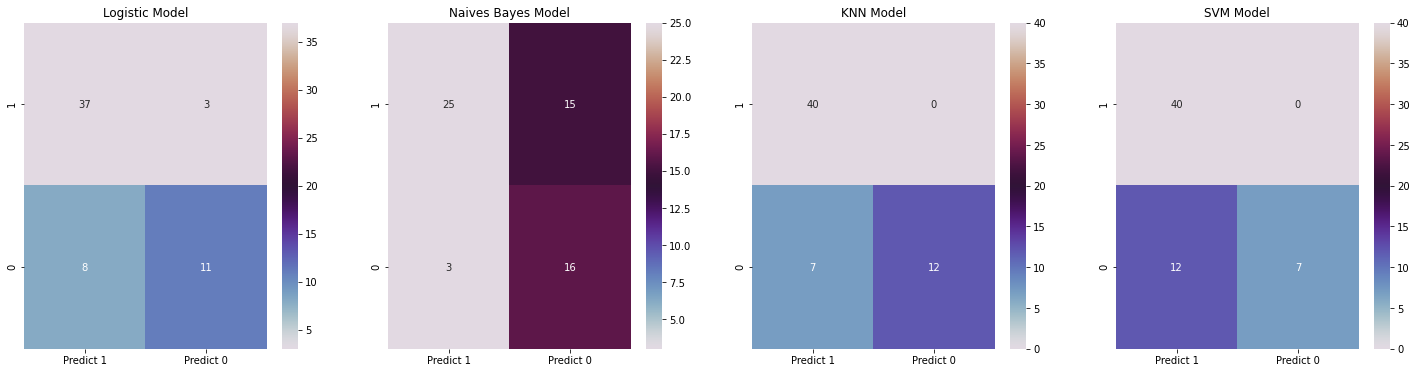

<Figure size 1440x1440 with 0 Axes>

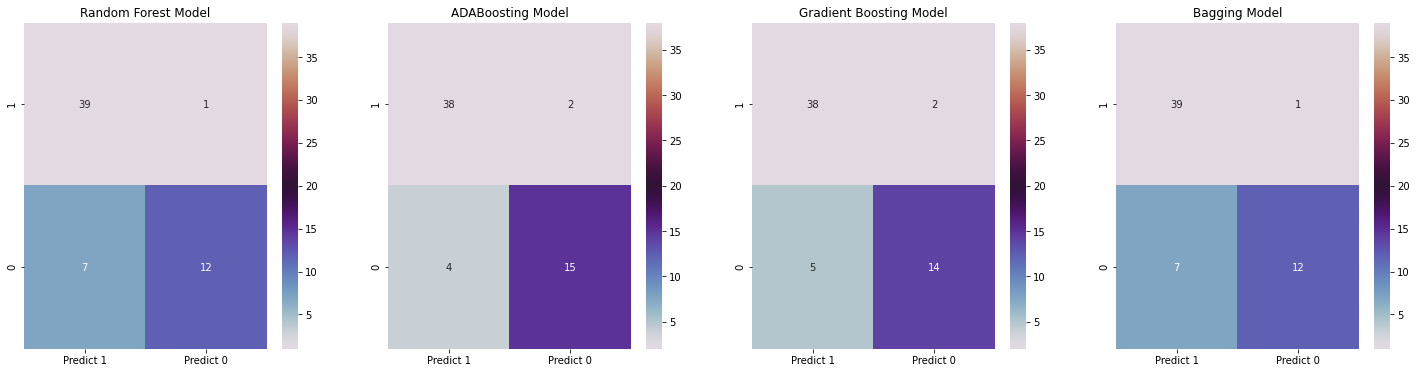

In [106]:
print(color.UNDERLINE+'Confusion matrix comaprision for all models:::'+color.END)
confusion_matrix("Logistic Model",y_predict_logistic,"Naives Bayes Model",y_predict_nb,"KNN Model",y_predict_knn,"SVM Model",y_predict_svm)
confusion_matrix("Random Forest Model",y_predict_rfcl,"ADABoosting Model",y_predict_abcl,"Gradient Boosting Model",y_predict_gbcl,"Bagging Model",y_predict_bgcl)

ROC Comparision for all algorithms:::


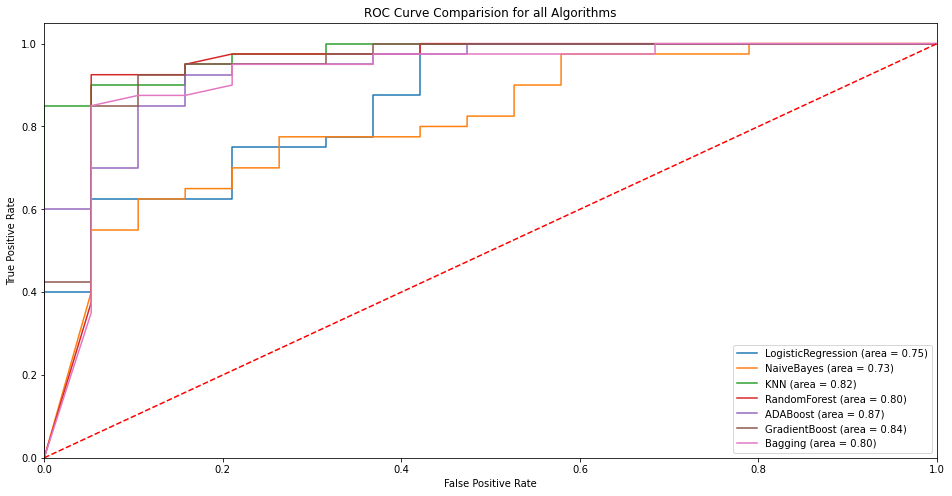

In [107]:
print(color.UNDERLINE+'ROC Comparision for all algorithms:::'+color.END)
roc_curve_plot(logistic_model,NB_model,KNN_model,rfcl_model,abcl_model,gbcl_model,bgcl_model)

#### Observation-5:
<p style = "font-family:verdana;font-size: 18px"> 
<ul type="square" style = "font-family:verdana;font-size: 18px">Observations for Best Model Selection
      <li>We have done scaling to the test data using StandardScaler - This basically resize the distribution of values so that mean of observed values is 0 and standard deviation is 1 </li>
    <li>Among the Logistic,KNN,Naive Bayes, SVM - KNN model gives best accuracy on test data i.e,, 88% . If we do stacking also then the accuracy is 88%. So we can say stacking is very useful if we have low accuracy models so that it'll give best accuracy.Here in our case all models are near/above to 80%.So stacking is best prefer for the weak models to get best accuracy</li>
    <li>Ensemble techniques are best optimal predictive models. Here in our model comparision among all the models <b>ADABoost</b> gave the highest accuracy</li>
    <li>Ensemble Techniques also deal best with Dataset having above mentioned Limitations(in Observation-1)</li>
      </ul>
</p>

<p style = "font-family:verdana;font-size: 18px"> 
<ul type="square" style = "font-family:verdana;font-size: 18px">Reasons to Tell ADABoost is best model
    <li>Based Upon accuracy,ROC Curve - ADABoost having highest value</li>
    <li>Based Upon Confusion Matrix - False Negative is 0 for KNN i.e,, none are predicted with Parkinson disease wrongly. But our dataset is related to healthcare -So here we have to consider True Positive rate should be higher because Person with Parkinson should not predicted wrongly. So here we should be careful about the Prediction of Parkinson disease (status=1) without any miscalculation.To say in simple <b> True Positive</b> rate should be more with less <b> False Positive</b>.So ADABoost satisfy this condition</li>
</ul>
</p>